In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

<font>Applying KMeans, it can be found that the cluster assignments end up becoming muddled.</font>

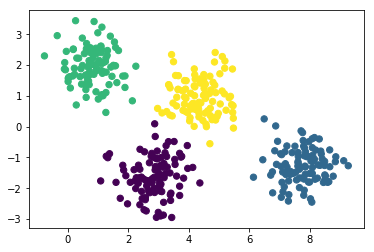

In [3]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

<font>The two disadvantages of k-means:<br/>
    <ol><li>Lack of flexibility in cluster shape.</li> 
        <li>Lack of probabilistic cluster assignment.</li></ol>
this means that for many datasets (especially low-dimensional datasets) it may not perform as well as expected.<br/><br/>To overcome this, the following is done:
<ol><li>Measure uncertainty in cluster assignment by comparing the distances of each point to *all cluster centers, rather than focusing on just the closest.</li>
<li>Allowing the cluster boundaries to be ellipses rather than circles, so as to account for non-circular clusters</li></ol><br/>This can be achieved using Gaussian mixture models, it uses an expectation–maximization approach which qualitatively does the following:
<ol><li>
    Choose starting guesses for the location and shape.</li>
<li>
Repeat until converged:
<ul><li>
    E-step: for each point, find weights encoding the probability of membership in each cluster</li>
<li>M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights</li></ul></li></ol></font>

In [4]:
import sklearn
import sklearn.mixture
print(sklearn.__version__)

0.20.1


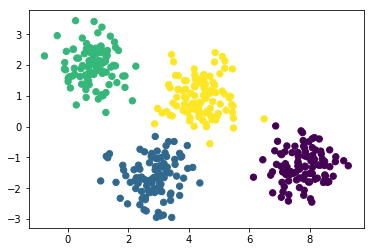

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [7]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.    0.    0.531]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]]


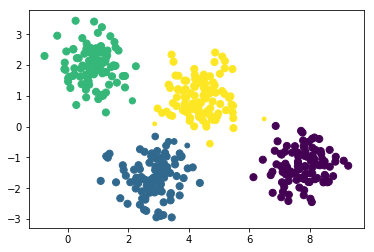

In [8]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);